In [2]:
%matplotlib inline

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Read in energy generation data as dataframe
generation_df = pd.read_csv('Data/energy_generation_data.csv', index_col=0, parse_dates=True)

generation_df.head()

,coal,natural gas,nuclear,petroleum,other,solar,hydro,wind
date,,,,,,,,
2023-12-31,1870097,4270620,2245684,7293,221858,305983,632266,1074159
2023-12-30,1964710,4369981,2215492,7661,224151,322528,628762,1064144
2023-12-29,1948705,4482785,2228321,8311,216563,312185,718066,1109628
2023-12-28,1776641,4480968,2224448,9639,209483,309365,701614,1119395
2023-12-27,1679634,4397551,2215389,8236,218310,262265,723729,1093226


In [4]:
# Read in energy demand data as dataframe
demand_df = pd.read_csv('Data/energy_demand_data.csv', index_col=0, parse_dates=True)

demand_df.head()

,total_demand
2023-12-31,10674523
2023-12-30,10821410
2023-12-29,11084647
2023-12-28,10907167
2023-12-27,10674973


In [5]:
# Sum amounts in each column of generation_df
generation_df['total_generated'] = generation_df.sum(axis=1)

generation_df['total_generated'].head()

date
2023-12-31    10627960
2023-12-30    10797429
2023-12-29    11024564
2023-12-28    10831553
2023-12-27    10598340
Name: total_generated, dtype: int64

In [6]:
# Combine dataframes
energy_df = generation_df.merge(demand_df, how='left', left_index=True, right_index=True)

energy_df.head()

,coal,natural gas,nuclear,petroleum,other,solar,hydro,wind,total_generated,total_demand
date,,,,,,,,,,
2023-12-31,1870097,4270620,2245684,7293,221858,305983,632266,1074159,10627960,10674523
2023-12-30,1964710,4369981,2215492,7661,224151,322528,628762,1064144,10797429,10821410
2023-12-29,1948705,4482785,2228321,8311,216563,312185,718066,1109628,11024564,11084647
2023-12-28,1776641,4480968,2224448,9639,209483,309365,701614,1119395,10831553,10907167
2023-12-27,1679634,4397551,2215389,8236,218310,262265,723729,1093226,10598340,10674973


In [7]:
# Check null values
energy_df.isna().sum()

coal               0
natural gas        0
nuclear            0
petroleum          0
other              0
solar              0
hydro              0
wind               0
total_generated    0
total_demand       0
dtype: int64

In [8]:
# Get summary statistics for entire dataframe
energy_df.describe()

,coal,natural gas,nuclear,petroleum,other,solar,hydro,wind,total_generated,total_demand
count,1.826000e+03,1.826000e+03,1.826000e+03,1826.000000,1826.000000,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03
mean,2.271783e+06,4.156591e+06,2.165472e+06,22896.248083,207222.064622,283472.796824,7.364040e+05,1.021341e+06,1.086518e+07,1.103157e+07
std,5.637212e+05,8.559362e+05,1.624858e+05,17994.892259,36432.085530,117613.939261,1.212391e+05,3.518294e+05,1.301253e+06,1.304928e+06
min,1.136578e+06,2.362626e+06,1.749670e+06,2959.000000,132441.000000,46755.000000,4.033230e+05,2.900780e+05,8.238613e+06,8.404965e+06
25%,1.838388e+06,3.497317e+06,2.056667e+06,12411.000000,183975.750000,194812.250000,6.574418e+05,7.586960e+05,9.893677e+06,1.002840e+07
50%,2.186894e+06,4.001372e+06,2.197422e+06,22649.500000,203175.000000,261994.000000,7.339280e+05,9.923050e+05,1.058130e+07,1.076194e+07
75%,2.701618e+06,4.698168e+06,2.272156e+06,27260.750000,225769.500000,358195.250000,8.149050e+05,1.241677e+06,1.176907e+07,1.194191e+07
max,3.962782e+06,6.658612e+06,2.509082e+06,427809.000000,672637.000000,587923.000000,1.122145e+06,2.076086e+06,1.469991e+07,1.482975e+07


In [9]:
# Check if there are entries where total_generated >= total_demand
energy_df[energy_df['total_generated'] >= energy_df['total_demand']]

,coal,natural gas,nuclear,petroleum,other,solar,hydro,wind,total_generated,total_demand
date,,,,,,,,,,
2023-12-14,1966272,4716258,2215313,10894,212605,287687,677762,1280292,11367083,11343308
2023-12-13,2142857,4826811,2214804,10446,207415,255117,693142,1112513,11463105,11420225
2023-12-12,2122030,4857500,2228112,11894,204378,316635,690244,1126899,11557692,11538087
2023-12-11,2115498,5048076,2212048,9133,201834,337969,658876,954481,11537915,11492941
2023-12-10,1758564,4241941,2213835,8274,209189,277478,538059,1135502,10382842,10340024
2023-12-09,1425607,3544286,2220954,8007,204384,302981,539085,1908785,10154089,10077066
2023-12-08,1647986,3951326,2262376,9378,205692,289081,578368,1771446,10715653,10676745
2023-12-07,1756944,4142559,2274760,9019,218738,305698,581667,1963765,11253150,11209022
2023-12-06,1841018,4490969,2270156,9330,206133,345397,585871,1474400,11223274,11180718


In [10]:
more_generated = len(energy_df[energy_df['total_generated'] >= energy_df['total_demand']])

print(f'''
    Surplus Energy Days: {more_generated}
    Deficit Energy Days: {len(energy_df) - more_generated}
''')


    Surplus Energy Days: 31
    Deficit Energy Days: 1795



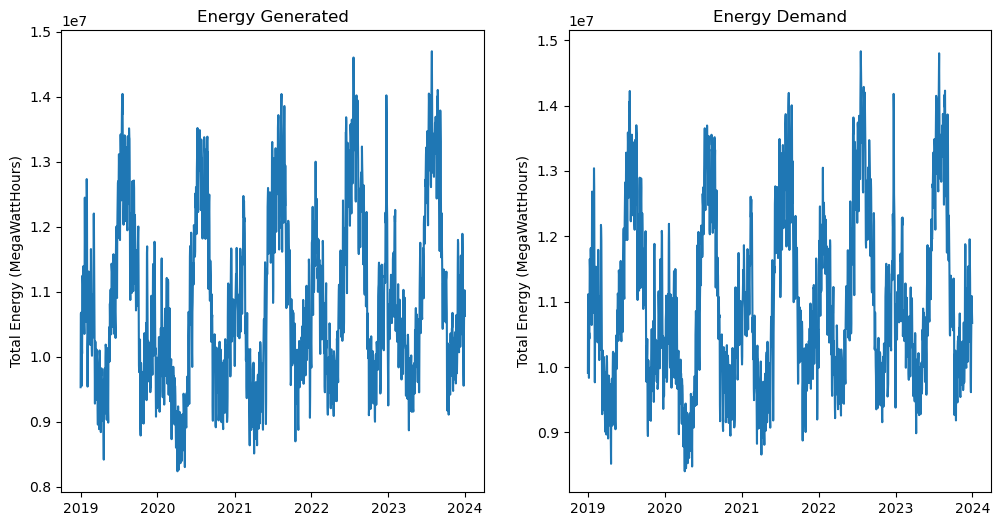

In [11]:
# Generate line plots for total_demand and total_generated
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(energy_df['total_generated'])
axs[0].set_title('Energy Generated')
axs[0].set_ylabel('Total Energy (MegaWattHours)')

axs[1].plot(energy_df['total_demand'])
axs[1].set_title('Energy Demand')
axs[1].set_ylabel('Total Energy (MegaWattHours)')

plt.show()

<AxesSubplot: xlabel='date'>

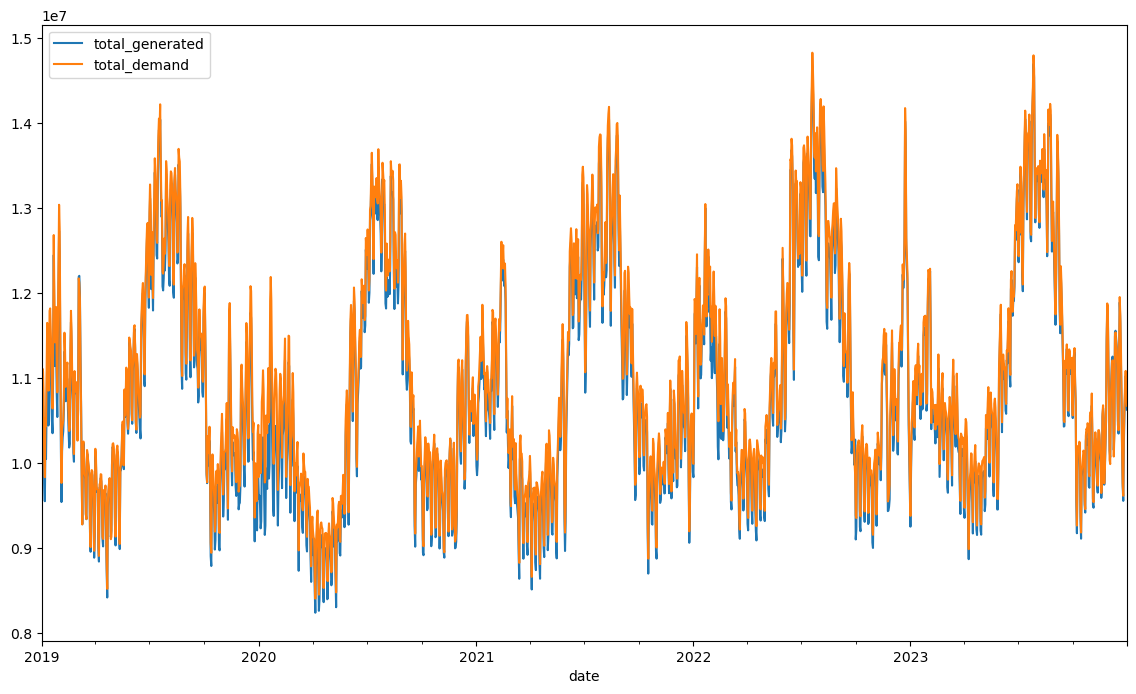

In [12]:
# Plot two time-series on same axis
energy_df[['total_generated', 'total_demand']].plot(figsize=(14, 8))

As expected, energy demand and generation follow the exact same trends. Unexpectedly demand consistently outstrips the amount of energy generated in the lower 48 states region for all but 31 days in the 5 year period.

Text(0, 0.5, 'Energy (MegaWattHours)')

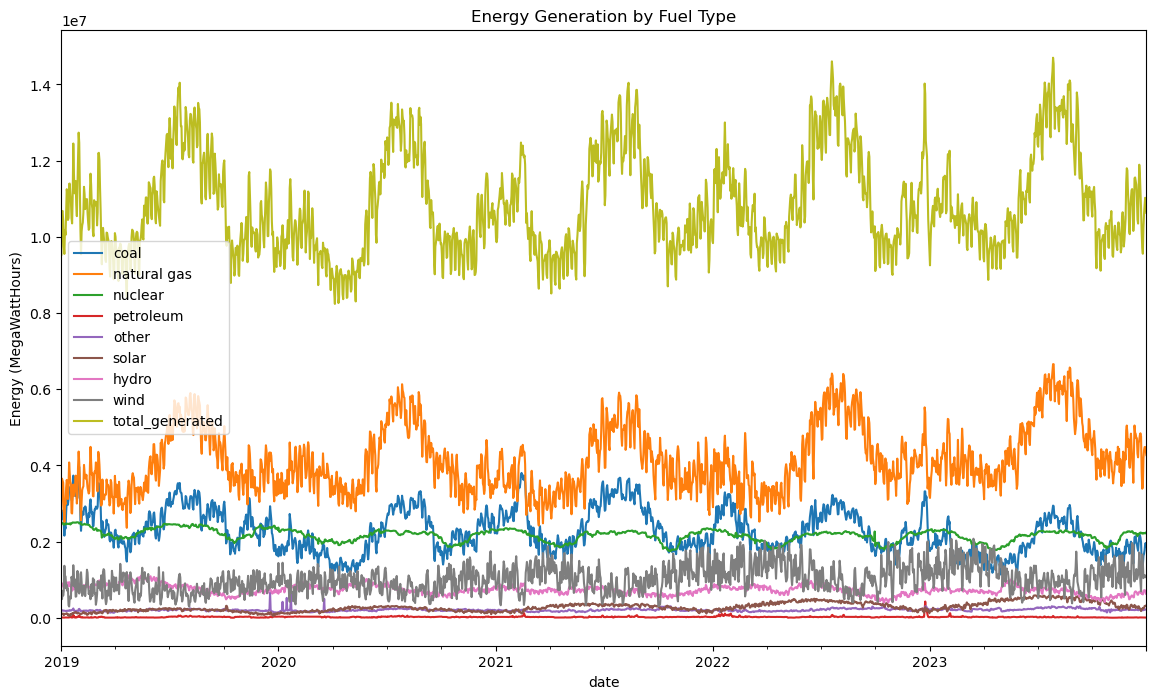

In [13]:
# Plot time-series for energy generation by fuel type
energy_df.iloc[:,:-1].plot(figsize=(14, 8))
plt.title('Energy Generation by Fuel Type')
plt.ylabel('Energy (MegaWattHours)')

In [14]:
# Add month column to df for aggregation
energy_df['month'] = energy_df.index.month

energy_df['month'].head()

date
2023-12-31    12
2023-12-30    12
2023-12-29    12
2023-12-28    12
2023-12-27    12
Name: month, dtype: int64

In [15]:
# Get mean values by month
energy_by_month = energy_df.groupby('month').mean()

energy_by_month

,coal,natural gas,nuclear,petroleum,other,solar,hydro,wind,total_generated,total_demand
month,,,,,,,,,,
1,2.516364e+06,3.769218e+06,2.334717e+06,31521.380645,205516.341935,169139.561290,797117.167742,1.022409e+06,1.084600e+07,1.114905e+07
2,2.397524e+06,3.793824e+06,2.238473e+06,29088.205674,185431.524823,212199.588652,793516.496454,1.111913e+06,1.076197e+07,1.097996e+07
3,1.947743e+06,3.483384e+06,2.065106e+06,20893.051613,177770.374194,255978.954839,772396.625806,1.166200e+06,9.889473e+06,1.003127e+07
4,1.680665e+06,3.323559e+06,1.934832e+06,14647.833333,185708.473333,314115.946667,746973.213333,1.224632e+06,9.425134e+06,9.568511e+06
5,1.877123e+06,3.641187e+06,2.086739e+06,16008.316129,190579.032258,347650.296774,866227.903226,1.041860e+06,1.006737e+07,1.020594e+07
6,2.436699e+06,4.638183e+06,2.246342e+06,21263.720000,205933.713333,372110.780000,852190.180000,9.339350e+05,1.170666e+07,1.184439e+07
7,2.968552e+06,5.509712e+06,2.280819e+06,29744.006452,236675.677419,372636.593548,781330.787097,7.928923e+05,1.297236e+07,1.314438e+07
8,2.915804e+06,5.454144e+06,2.279795e+06,27939.761290,242503.903226,348048.045161,719910.522581,7.807387e+05,1.276888e+07,1.295257e+07
9,2.384569e+06,4.612808e+06,2.196369e+06,19910.200000,220588.020000,322323.886667,618489.353333,8.780149e+05,1.125307e+07,1.140907e+07


<AxesSubplot: xlabel='month'>

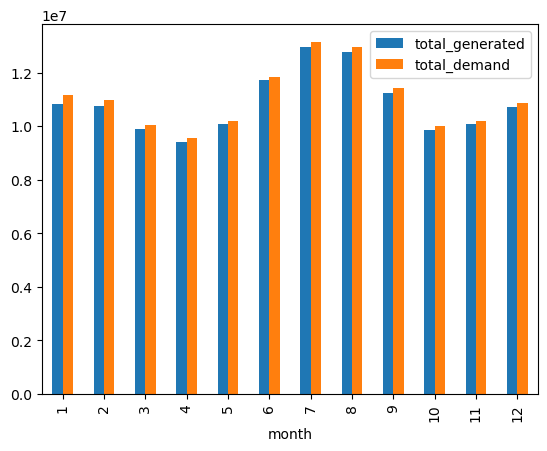

In [16]:
# Plot average totals by the month
energy_by_month[['total_generated', 'total_demand']].plot.bar()

<AxesSubplot: xlabel='month'>

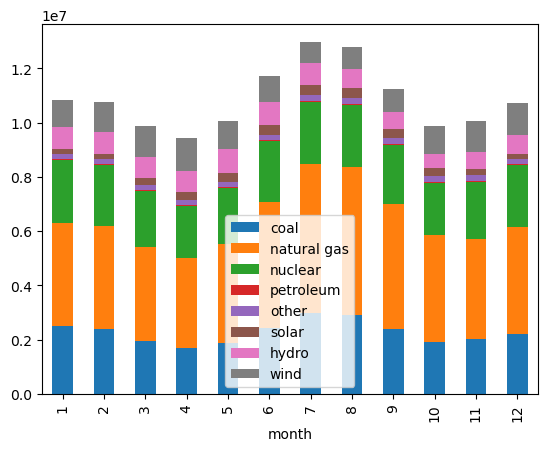

In [17]:
# Plot each type of generated energy by month
energy_by_month.iloc[:,:-2].plot.bar(stacked=True)

In [37]:
# Function to seasonally decompose a column and plot result
def decomposition_plot(col):
    decomposition_result = seasonal_decompose(col[::-1], period=365, model='multiplicative')
    
    decomposition_result.plot()
    plt.show()

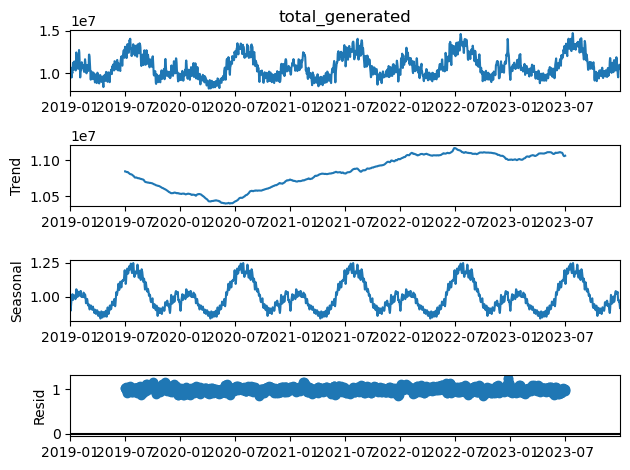

In [38]:
# Use seasonal decomposition on total energy generated
decomposition_plot(energy_df['total_generated'])

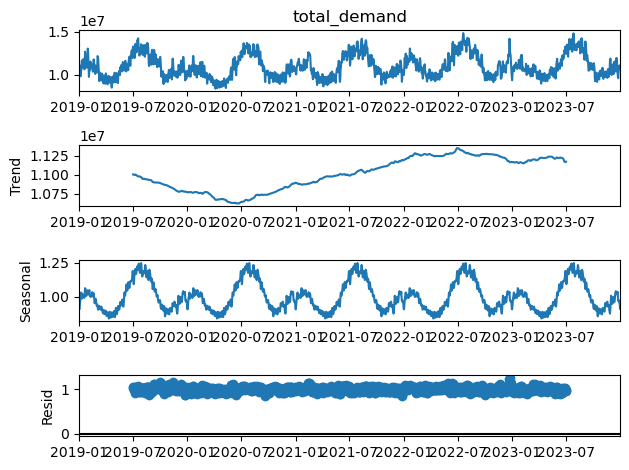

In [39]:
# Use seasonal decomposition on total energy demand
decomposition_plot(energy_df['total_demand'])